In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor


# Problem Statement

## Say you're a homeowner in Ames, Iowa, hoping to improve their chances at selling their house.  What features of a property have the most positive impact on a house's sale price? My regression model will help to find what features of a home have the greatest impact on it's sale.

# Getting started, cleaning up
Doing test and train side by side

In [172]:
train_df = pd.read_csv('../datasets/train.csv')

In [173]:
test_df = pd.read_csv('../datasets/test.csv')

In [174]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [175]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [176]:
train_df.shape

(2051, 81)

In [177]:
test_df.shape

(878, 80)

Let's get a look at some summary statistics.

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

There's quite a few columns here with many null values, and many columns we expect to be numeric which are instead objects.

In [179]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Let's take a moment to consider what this description tells us.  Our Sale Price, for instance, is within a reasonable min and max for home sales: 12,789 up to 611,657.  No million dollar properties, here, but a decent spread.  The standard deviation of that same Sale Price value also speaks to the spread of sales represented:  most of the prices will fall between 102,211 and 260,727, which is an easily believable range for house pricing.  

Let's look at the distribution of the target variable, Sale Price.

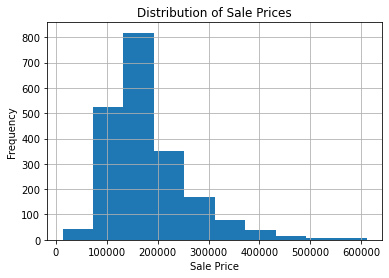

In [180]:
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
train_df['SalePrice'].hist();

The distribution clearly has a skew to the left.  A great majority of the houses sold fall in the 100k to 200k range, with most around 200k.  However, more houses sell for greater than 200k than sell for less than 100k.  This approaches a normal distribution, but those quirks keeps it from being perfectly normal.

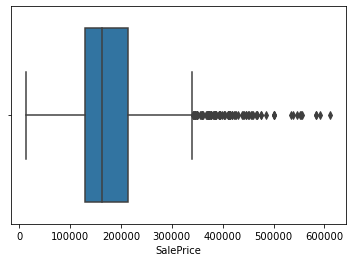

In [181]:
sns.boxplot(x=train_df['SalePrice']);

That's a lot of outliers on the right, there.  Let's look into those a little bit more.  

In [182]:
#creating a variable to judge our high outliers by
upper_limit = train_df['SalePrice'].mean() + ( 3 * train_df['SalePrice'].std())

train_df[train_df['SalePrice'] > upper_limit].shape

(33, 81)

33 high outliers, judging by our Sale Price column.  That's about 1.6% of our whole dataset.  Small, but not infinitesimal.  Nonetheless, I do not believe these houses to be worth removing from the dataset, considering that home values can reach astronomical heights from time to time, and while these values are out of the norm of the dataset, I do not think them beyond what can be seen in terms of a larger population.  Removing them may improve the performance of the model on our own testing set, but the model would not be reflective of reality, and thus would likely not be as accurate in a general population.  

## Cleaning up Nulls, Solving Objects, and Fixing 0's

First, let's make sure we're not dealing with any empty lots.  Any house with a 1st floor square footage of 0 isn't a house, but an empty lot!

In [183]:
train_df[train_df['1st Flr SF'] <= 400]['1st Flr SF']

700     372
1428    334
Name: 1st Flr SF, dtype: int64

We're good! The lowest we go is 334 square feet.  Small, but still a house.

We've got a lot of nulls to work through, as well as lots of objects that we need to be numeric.  Let's handle them bit by bit.

First, we change all relevant ordinal values to numbers from 1-5, instead of their string values of EX-Po.

In [184]:
train_df.replace(['Ex','Go','TA','Fa','Po', 'Gd'], [5,4,3,2,1,4], inplace = True)
test_df.replace(['Ex','Go','TA','Fa','Po', 'Gd'], [5,4,3,2,1,4], inplace = True)

Putting 0 in missing ordinal values, as it is clear from the dictionary that those values are only missing because there is no garage/pool/fireplace/basement to score.

In [185]:
train_df['Pool QC'].fillna(0, inplace = True)
test_df['Pool QC'].fillna(0, inplace = True)

train_df['Garage Qual'].fillna(0, inplace = True)
test_df['Garage Qual'].fillna(0, inplace = True)

train_df['Garage Cond'].fillna(0, inplace = True)
test_df['Garage Cond'].fillna(0,inplace = True)

train_df['Fireplace Qu'].fillna(0, inplace = True)
test_df['Fireplace Qu'].fillna(0, inplace = True)

train_df['Bsmt Cond'].fillna(0, inplace = True)
test_df['Bsmt Cond'].fillna(0, inplace = True)

train_df['Bsmt Qual'].fillna(0, inplace = True)
test_df['Bsmt Qual'].fillna(0, inplace = True)

One hot encoding the masonry veneer column, then dropping the original column and the mas_None column.  Thus, if a row has no value in any of the mas_ columns, then it must have no masonry veneer at all.

In [186]:
train_df = train_df.join(pd.get_dummies(data = train_df['Mas Vnr Type'], prefix = 'mas'))
test_df = test_df.join(pd.get_dummies(data = test_df['Mas Vnr Type'], prefix = 'mas'))
train_df.drop(columns = ['mas_None', 'Mas Vnr Type'], inplace = True)
test_df.drop(columns = ['mas_None', 'Mas Vnr Type'], inplace = True)

Renaming every column to snake_case.

In [187]:
train_df.columns = [column_name.replace(' ', '_').lower() for column_name in train_df.columns]
test_df.columns = [column_name.replace(' ', '_').lower() for column_name in test_df.columns]

In [188]:
train_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_area',
       'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc',
       'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces',
       'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',
       '

Let's limit the columns we'll work with from here. 80 columns is a lot to handle, and far more than the recommonded ratio (square root of # of rows, in this case 46 columns to the 2051 rows).  Let's limit ourselves just to 38 easily interpretable and numerical columns.

In [189]:
#think it's actually more economical to filter like this, as opposed to doing 'drop,', as I'm keeping less than half.
train_df = train_df.filter(['id',
                            'lot_frontage',
                            'lot_area',
                            'overall_qual',
                            'overall_cond',
                            'year_built',
                            'year_remod/add',
                            'bsmt_qual',
                            'bsmt_cond',
                            'total_bsmt_sf',
                            '1st_flr_sf',
                            '2nd_flr_sf',
                            'low_qual_fin_sf',
                            'bsmt_full_bath',
                            'bsmt_half_bath',
                            'full_bath', 
                            'half_bath', 
                            'bedroom_abvgr',
                            'kitchen_abvgr', 
                            'kitchen_qual',
                            'totrms_abvgrd',
                            'fireplaces',
                            'fireplace_qu',
                            'garage_yr_built',
                            'garage_cars',
                            'garage_area',
                            'garage_qual',
                            'garage_cond',
                            'wood_deck_sf',
                            'open_porch_sf',
                            'enclosed_porch',
                            '3ssn_porch',
                            'screen_porch',
                            'pool_area',
                            'pool_qc',
                            'saleprice',
                           'mas_brkcmn',
                           'mas_brkface',
                           'mas_stone'],
                           axis = 1)

In [190]:
train_df.shape

(2051, 38)

Let's see how many null values are left in our features.

In [191]:
train_df.isna().sum()

id                   0
lot_frontage       330
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
bsmt_qual            0
bsmt_cond            0
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
bsmt_full_bath       2
bsmt_half_bath       2
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
kitchen_qual         0
totrms_abvgrd        0
fireplaces           0
fireplace_qu         0
garage_cars          1
garage_area          1
garage_qual          0
garage_cond          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
pool_qc              0
saleprice            0
mas_brkcmn           0
mas_brkface          0
mas_stone            0
dtype: int64

Not too many, outside of the Lot Frontage column.

In [192]:
train_df.fillna(0,inplace = True)

test_df.fillna(0, inplace = True)

Fixing nulls!  Justifying these as, again, if it's a 0 it means there isn't one at all.  Having no street frontage for the house is the same as having 0. 

## Last look at nulls and dtypes.

In [193]:
train_df.isna().sum()

id                 0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
bsmt_qual          0
bsmt_cond          0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
kitchen_qual       0
totrms_abvgrd      0
fireplaces         0
fireplace_qu       0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
pool_qc            0
saleprice          0
mas_brkcmn         0
mas_brkface        0
mas_stone          0
dtype: int64

In [194]:
train_df.dtypes

id                   int64
lot_frontage       float64
lot_area             int64
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
bsmt_qual          float64
bsmt_cond          float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
kitchen_qual         int64
totrms_abvgrd        int64
fireplaces           int64
fireplace_qu       float64
garage_cars        float64
garage_area        float64
garage_qual        float64
garage_cond        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
pool_qc            float64
saleprice            int64
mas_brkcmn           uint8
mas_brkface          uint8
m

No nulls!  All numbers!  Good for now.  Let's start some feature engineering.  As of now, with the model below, I've got a Kaggle score of 38363.  Let's make that a little better with some more features.

# Feature Engineering



First, let's run a pairplot a few times until we find some colinear variables.

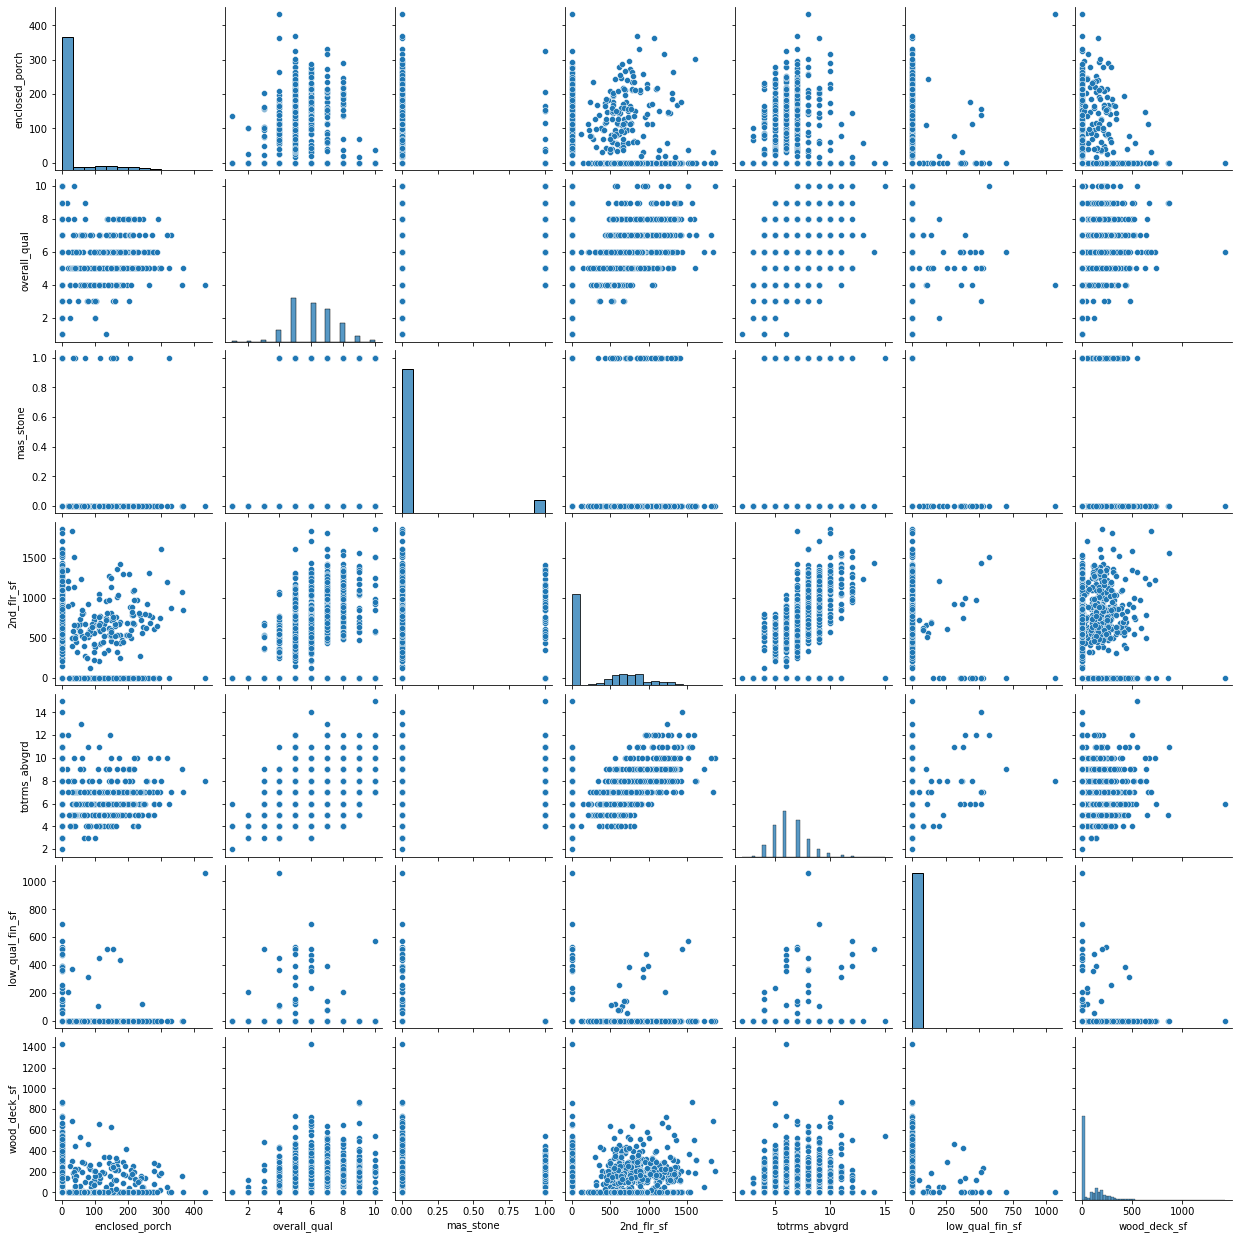

In [195]:
my_sample = train_df.sample(7, axis = 1)
sns.pairplot(my_sample,diag_kind = 'hist')

After running that pairplot a few times, I've discovered a distinct relationship between the # of rooms and the overall quality of home.  These seem to be colinear.

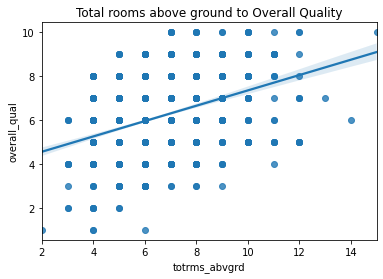

In [196]:
plt.title('Total rooms above ground to Overall Quality')
sns.regplot(x =train_df['totrms_abvgrd'],y =train_df['overall_qual']);

It appears that like the more rooms we have above ground, the better our overall quality score is.  So, let's make an interaction term out of it and add it to our model.  

In [197]:
train_df['totrms_abvgrd * overall_qual'] = train_df['totrms_abvgrd'] * train_df['overall_qual']
test_df['totrms_abvgrd * overall_qual'] = test_df['totrms_abvgrd'] * test_df['overall_qual']

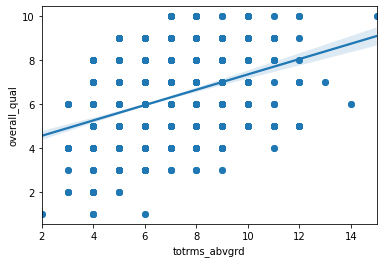

In [198]:
plt.xlabel('total rooms above ground')
plt.ylabel('overall quality')
sns.regplot(x =train_df['totrms_abvgrd'],y =train_df['overall_qual'])
plt.scatter(train_df['totrms_abvgrd'],train_df['overall_qual']);

In [199]:
train_df.shape

(2051, 39)

Now that we've added a valuable interaction term, let's see if there's any noise left we can cull.

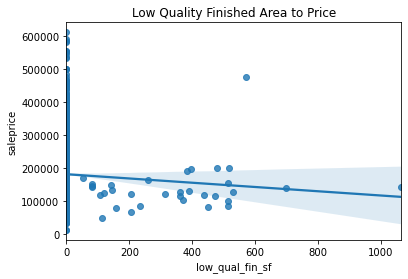

In [200]:
plt.title('Low Quality Finished Area to Price')
sns.regplot(x =train_df['low_qual_fin_sf'],y =train_df['saleprice']);

Doesn't seem like much of a relationship there.  Let's cut that noise out.

In [201]:
train_df.drop(columns = 'low_qual_fin_sf', inplace = True)
test_df.drop(columns = 'low_qual_fin_sf', inplace = True)

Feature engineering complete!  I could find no further colinear variables, and comparing 40 variables to the sale price is not time effective, so I'm stopping here, .

## Let's build a model

First, let's get our X and y variables assigned, and then split, and finally let's get scaled versions as well.

In [202]:
X = train_df.drop(columns = ['id','saleprice'])
features = list(X.columns)
y = train_df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 26)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

Next, I fit my various models, and also set up their prediction and residual variables.

In [203]:
#base linear model first
lr = LinearRegression()
lr.fit(X_train, y_train)
#scaled linear model next
scaled_lr = LinearRegression()
scaled_lr.fit(X_train_sc, y_train)
#lasso regularized model next
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train_sc, y_train)
#ridge regularized model next
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_train_sc, y_train)
#base prediction and residuals first
pred = lr.predict(X_test)
residuals = y_test - pred
#scaled next
scaled_pred = scaled_lr.predict(X_test_sc)
scaled_resids = y_test - scaled_pred
#lasso next
lasso_pred = lasso_reg.predict(X_test_sc)
lasso_resids = y_test - lasso_pred
#regression last
ridge_pred = ridge_reg.predict(X_test_sc)
ridge_resids = y_test - ridge_pred

Next, let's see the distributions of all our residuals, from all four of our models.

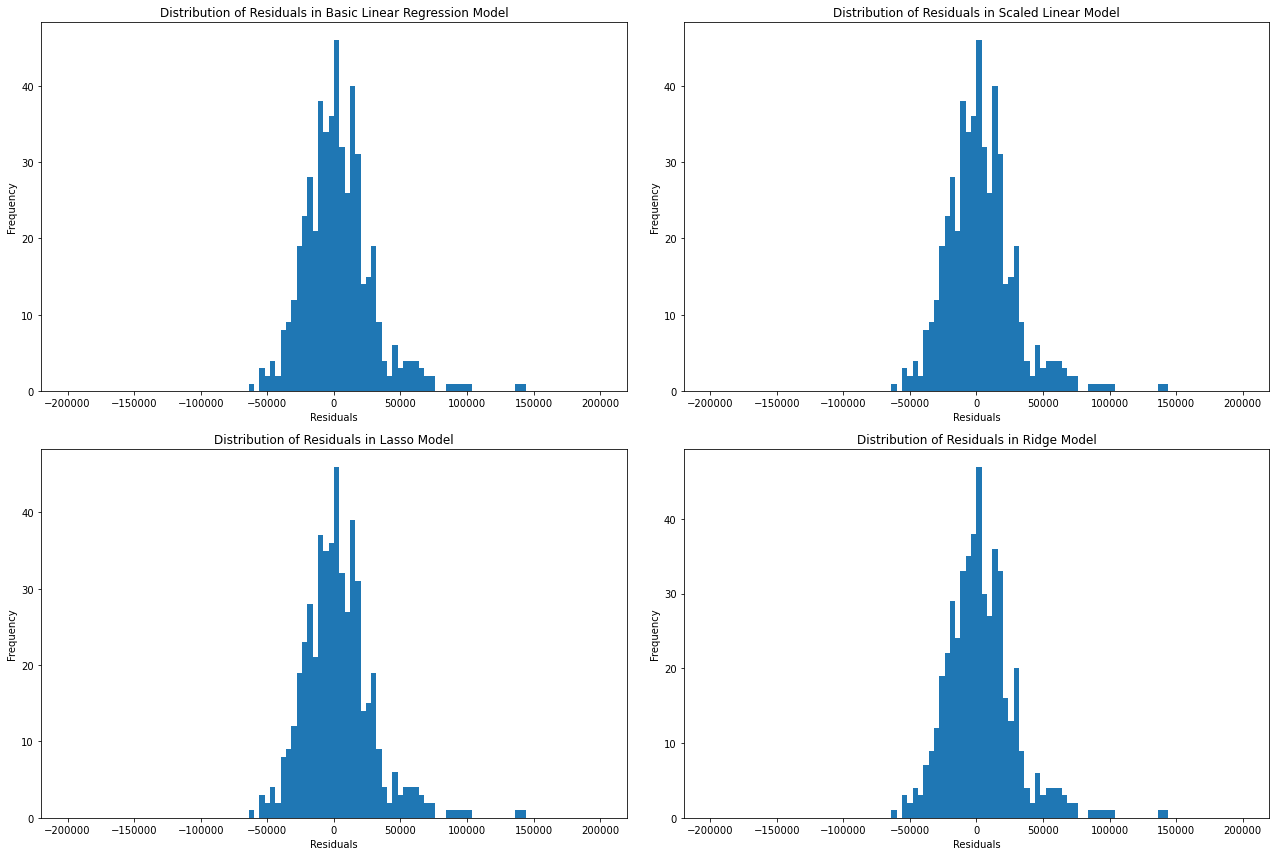

In [204]:
plt.subplot(221)
plt.title('Distribution of Residuals in Basic Linear Regression Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(residuals, bins = 100, range = (-200_000, 200_000))
plt.subplot(222)
plt.title('Distribution of Residuals in Scaled Linear Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(scaled_resids, bins = 100, range = (-200_000, 200_000))
plt.subplot(223)
plt.title('Distribution of Residuals in Lasso Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(lasso_resids, bins = 100, range = (-200_000, 200_000))
plt.subplot(224)
plt.title('Distribution of Residuals in Ridge Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(ridge_resids, bins = 100, range = (-200_000, 200_000))
plt.tight_layout(rect = (3,3,6,6));

We've got normal distributions of residuals for each model here. 

Next, let's look at the relationships between our predictions and the residuals for each model.

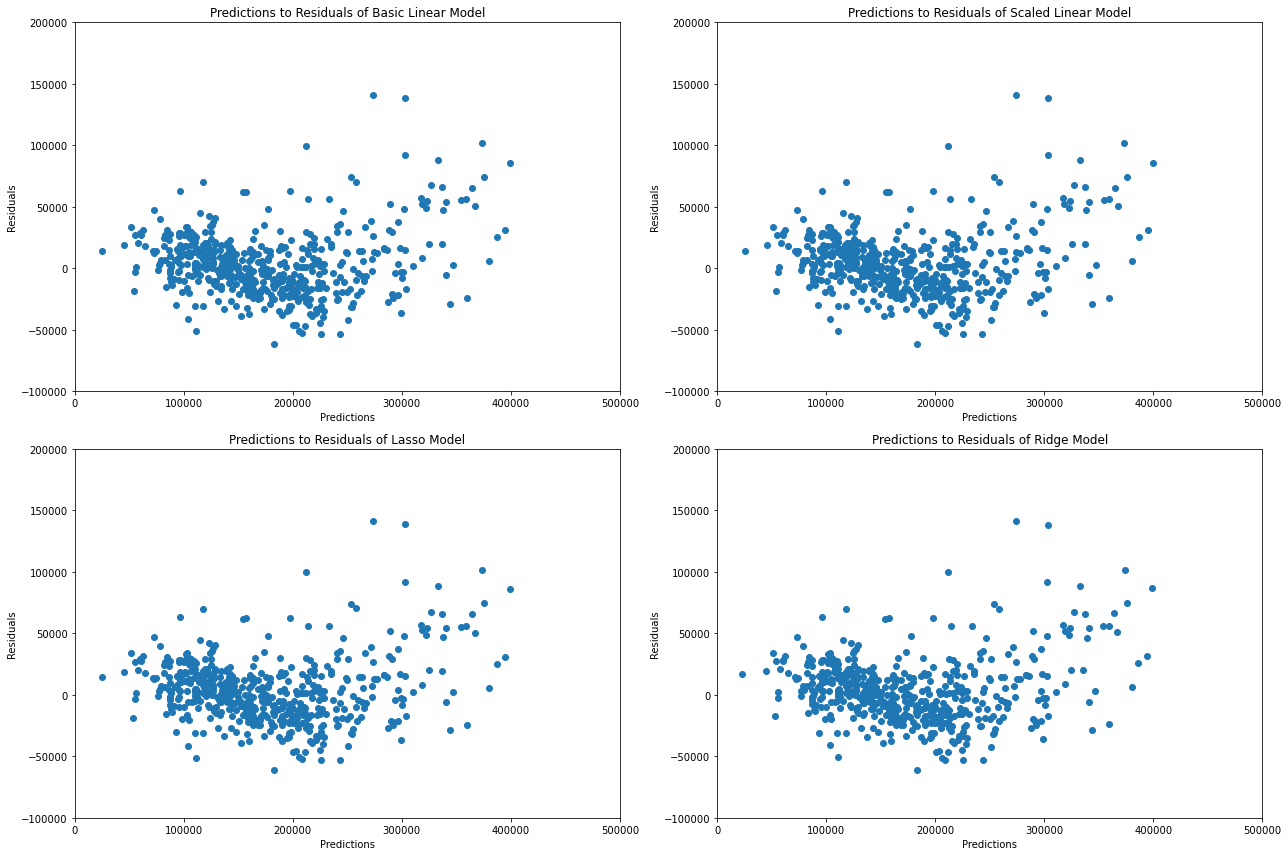

In [205]:
plt.subplot(221)
plt.title('Predictions to Residuals of Basic Linear Model')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.xlim(0,500_000)
plt.ylim(-100_000, 200_000)
plt.scatter(pred, residuals)
plt.subplot(222)
plt.title('Predictions to Residuals of Scaled Linear Model')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.xlim(0,500_000)
plt.ylim(-100_000, 200_000)
plt.scatter(scaled_pred, scaled_resids)
plt.subplot(223)
plt.title('Predictions to Residuals of Lasso Model')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.xlim(0,500_000)
plt.ylim(-100_000, 200_000)
plt.scatter(lasso_pred, lasso_resids)
plt.subplot(224)
plt.title('Predictions to Residuals of Ridge Model')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.xlim(0,500_000)
plt.ylim(-100_000, 200_000)
plt.scatter(ridge_pred, ridge_resids)
plt.tight_layout(rect = (3,3,6,6));

Neither terribly biased nor terribly heteroscedastic, in any of the 4 models.  
Works decently up to 300,000, but not very well past that.
By this metric, they seem to all perform equally well.

In [206]:
dummy_reg = DummyRegressor()
dummy_reg.fit(X, y)
dummy_reg.score(X,y)

0.0

In [207]:
dummy_reg.predict(X)

array([181469.70160897, 181469.70160897, 181469.70160897, ...,
       181469.70160897, 181469.70160897, 181469.70160897])

We shouldn't struggle to perform better than our baseline, but let's hope it does much, much better.

In [208]:
def score_giver(estimator, training_set, testing_set):
    if estimator == scaled_lr:
        print(f'The scaled training {estimator} r2 score is: {estimator.score(training_set[0], training_set[1])}')
        print(f'The scaled testing {estimator} r2 score is: {estimator.score(testing_set[0], testing_set[1])}')
        print(f'The scaled testing {estimator} Mean Absolute Error is: {metrics.mean_absolute_error(testing_set[1], estimator.predict(testing_set[0]))}')
    else:
        print(f'The training {estimator} r2 score is: {estimator.score(training_set[0], training_set[1])}')
        print(f'The testing {estimator} r2 score is: {estimator.score(testing_set[0], testing_set[1])}')
        print(f'The testing {estimator} Mean Absolute Error is: {metrics.mean_absolute_error(testing_set[1], estimator.predict(testing_set[0]))}')
score_giver(lr, (X_train, y_train), (X_test, y_test))
score_giver(scaled_lr, (X_train_sc, y_train), (X_test_sc, y_test))
score_giver(lasso_reg, (X_train, y_train), (X_test, y_test))
score_giver(ridge_reg, (X_train, y_train), (X_test, y_test))

The training LinearRegression() r2 score is: 0.8328900041027364
The testing LinearRegression() r2 score is: 0.8865819844428519
The testing LinearRegression() Mean Absolute Error is: 19182.855239045297
The scaled training LinearRegression() r2 score is: 0.8328900041027363
The scaled testing LinearRegression() r2 score is: 0.8865819844428553
The scaled testing LinearRegression() Mean Absolute Error is: 19182.855239045195
The training Lasso(alpha=1) r2 score is: -1926147.0573029297
The testing Lasso(alpha=1) r2 score is: -1854548.4226197244
The testing Lasso(alpha=1) Mean Absolute Error is: 100553320.64470415
The training Ridge(alpha=1) r2 score is: -1932262.2064377423
The testing Ridge(alpha=1) r2 score is: -1859981.7533687458
The testing Ridge(alpha=1) Mean Absolute Error is: 100681793.90529142


Of all these, the scaled Linear Regression has the best r2 score, and the best MAE score (even if that MAE is about 18,000 dollars off on average)! However, I am sticking to the basic Linear Regression model, as the difference between the two is miniscule, and simpler is better when explaining data to the average homeowner.  

The model takes in features that I found to be the most compelling of those listed in the data dictionary, and clearly shows the relationship between those features and the target feature, sale price.

Let's take a look at all our coefficients, nicely sorted with their corresponding feature.

In [209]:
def coefficient_dictionary_builder(feature_set, estimator):
    return {key:value for key, value in zip(np.array(feature_set.columns), np.array(estimator.coef_))}
coefficient_dictionary_builder(X, lr)

{'lot_frontage': 52.651872200047535,
 'lot_area': 0.8152086974617674,
 'overall_qual': -4322.087513669475,
 'overall_cond': 4725.769677185832,
 'year_built': 269.1477761568396,
 'year_remod/add': -32.64380410879307,
 'bsmt_qual': 10948.050925205673,
 'bsmt_cond': -7782.97284033004,
 'total_bsmt_sf': 1.4286898954656015,
 '1st_flr_sf': 41.42081806190912,
 '2nd_flr_sf': 22.966205273595303,
 'bsmt_full_bath': 14352.635814912073,
 'bsmt_half_bath': -1613.262074640376,
 'full_bath': 4393.565427254263,
 'half_bath': 2074.1018008816527,
 'bedroom_abvgr': -820.1381849125914,
 'kitchen_abvgr': -6809.771065449667,
 'kitchen_qual': 14554.623449999093,
 'totrms_abvgrd': -15454.652589658197,
 'fireplaces': -3925.78178435109,
 'fireplace_qu': 4883.552879335058,
 'garage_cars': 6644.1353181592285,
 'garage_area': 22.13745282013601,
 'garage_qual': 1375.628035308309,
 'garage_cond': -5445.394170352196,
 'wood_deck_sf': 16.730873298919565,
 'open_porch_sf': -7.95556552069729,
 'enclosed_porch': 31.01922

The most exciting coefficients here lie in fireplaces, garage quality, pool quality, and basement quality.  For every increase in each one of these values, a house's sale price would go up by at least $3000.  As for projects that can be DIY-ed, a large screen porch is a good idea, judging solely by these coefficients.

## Let's set up our submission to the kaggle competition.

In [210]:
test_df[features].isnull().sum()

lot_frontage                    0
lot_area                        0
overall_qual                    0
overall_cond                    0
year_built                      0
year_remod/add                  0
bsmt_qual                       0
bsmt_cond                       0
total_bsmt_sf                   0
1st_flr_sf                      0
2nd_flr_sf                      0
bsmt_full_bath                  0
bsmt_half_bath                  0
full_bath                       0
half_bath                       0
bedroom_abvgr                   0
kitchen_abvgr                   0
kitchen_qual                    0
totrms_abvgrd                   0
fireplaces                      0
fireplace_qu                    0
garage_cars                     0
garage_area                     0
garage_qual                     0
garage_cond                     0
wood_deck_sf                    0
open_porch_sf                   0
enclosed_porch                  0
3ssn_porch                      0
screen_porch  

Model built, and submitted to kaggle!  Not a competition winner, sadly.  Not the best model built, but far and away better than baseline.

In [211]:
test_pred = lr.predict(test_df[features])

test_df['SalePrice'] = test_pred

test_df[['id', 'SalePrice']].to_csv('../datasets/submission.csv', index=False)

## Visualization Time!

This should be obvious, but let's see what the relationship between overall quality of a property and it's sale price is.

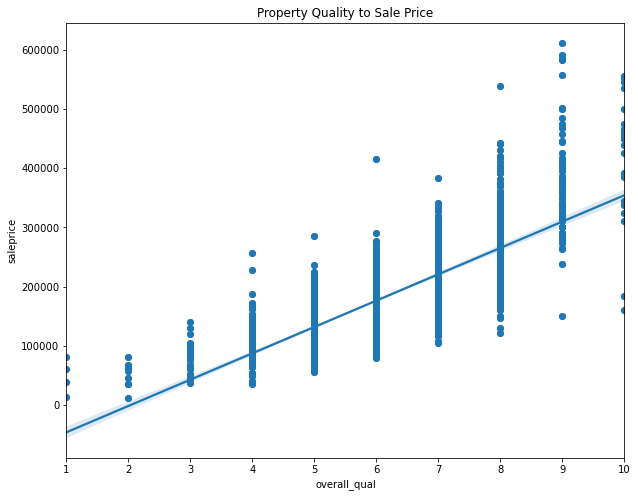

In [212]:
plt.figure(figsize=(10,8))
plt.title('Property Quality to Sale Price')
plt.xlabel('Overall Quality Score')
plt.ylabel('Sale Price (USD)')
sns.regplot(x=train_df['overall_qual'], y=train_df['saleprice'])
plt.scatter(train_df['overall_qual'], train_df['saleprice']);

Of course the quality of a property will increase how much it sells for!  It's difficult to gauge exactly what 'quality' includes, but we can clearly see the relationship here.  Let's look at more specific features, though, to see what a homeowner can do themselves to clearly impact their value.

Let's see what the relationship of a garage's quality and condition are to it's sale price.

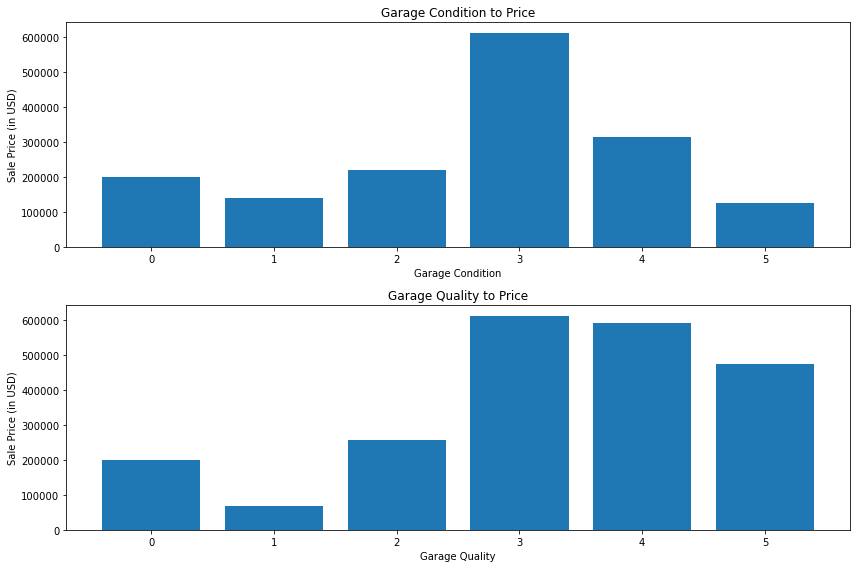

In [213]:
plt.subplot(2,1,1)
plt.title('Garage Condition to Price')
plt.xlabel('Garage Condition')
plt.ylabel('Sale Price (in USD)')
plt.bar(train_df['garage_cond'], train_df['saleprice'])
plt.subplot(2,1,2)
plt.title('Garage Quality to Price')
plt.xlabel('Garage Quality')
plt.ylabel('Sale Price (in USD)')
plt.bar(train_df['garage_qual'], train_df['saleprice'])
plt.tight_layout(rect = (2,2,4,4))
plt.show;

Short graphs, but the trend is clear:  There comes a point of diminishing returns when it comes to garage quality and condition. Despite what the coefficients of quality and condition tell us, the relationship is not a straight line here.  Instead, improving your garage past a grade of 3 in either specification will have very little impact upon your sale.  However, if your garage is currently in poor condition, consider putting in the work to bring it up to a respectable state.  While going above and beyond may not benefit you, having a poor garage can only harm your final price.

How about the size of your porch?  If you've got a sizable porch, perhaps you stand to make more money.  Maybe the kind of porch you build can improve your chances as well.

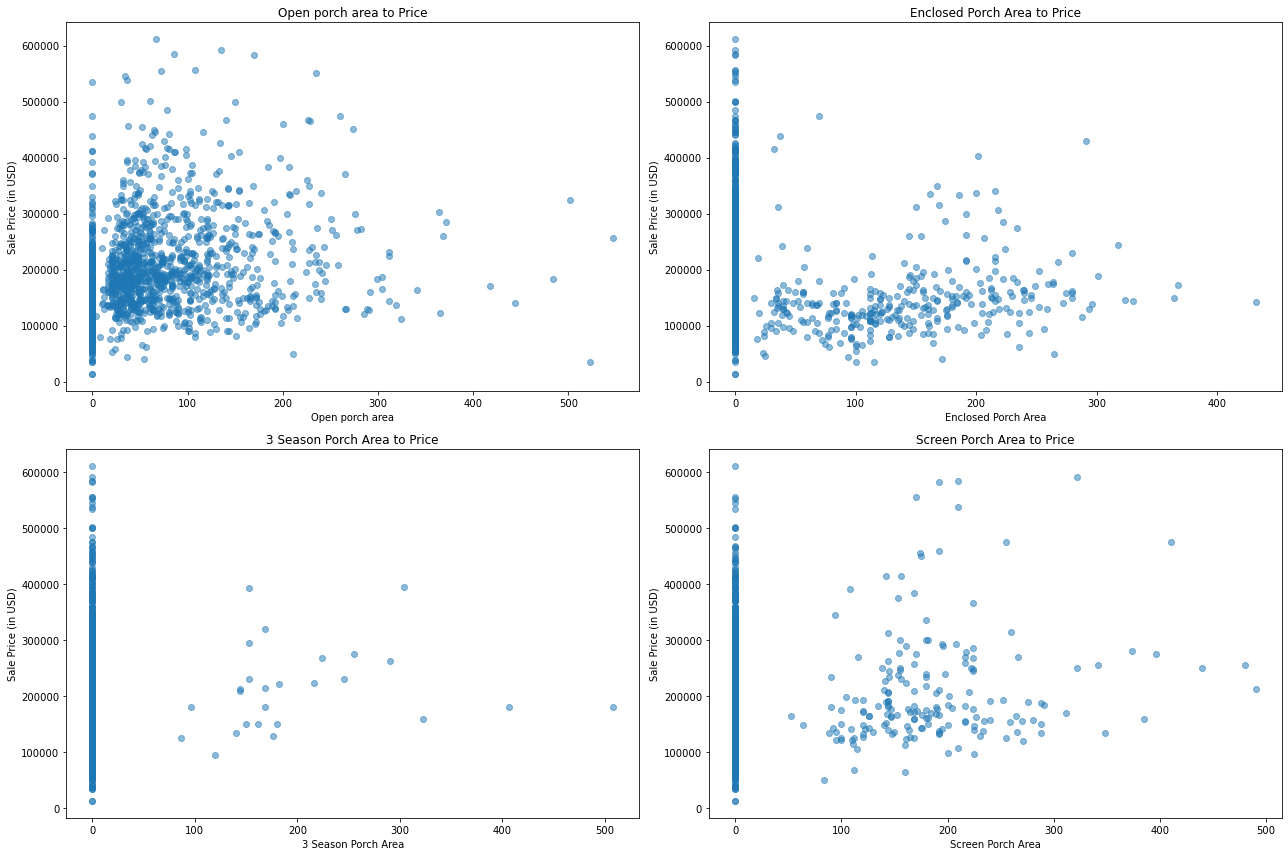

In [214]:
plt.subplot(2,2,1)
plt.title('Open porch area to Price')
plt.xlabel('Open porch area')
plt.ylabel('Sale Price (in USD)')
plt.scatter(train_df['open_porch_sf'], train_df['saleprice'], alpha = 0.5)
plt.subplot(2,2,2)
plt.title('Enclosed Porch Area to Price')
plt.xlabel('Enclosed Porch Area')
plt.ylabel('Sale Price (in USD)')
plt.scatter(train_df['enclosed_porch'], train_df['saleprice'], alpha = 0.5)
plt.subplot(2,2,3)
plt.title('3 Season Porch Area to Price')
plt.xlabel('3 Season Porch Area')
plt.ylabel('Sale Price (in USD)')
plt.scatter(train_df['3ssn_porch'], train_df['saleprice'], alpha = 0.5)
plt.subplot(2,2,4)
plt.title('Screen Porch Area to Price')
plt.xlabel('Screen Porch Area')
plt.ylabel('Sale Price (in USD)')
plt.scatter(train_df['screen_porch'], train_df['saleprice'], alpha = 0.5)
plt.tight_layout(rect = (3,3,6,6))
plt.show;

Judging from these graphs, it seems that a great many houses sold do not, in fact, have any manner of porch at all.  However, if you want to build a porch to increase your value, the best value to area seems to be in building an open porch.  Interestingly, if we were only to look at the coefficient for the Open Porch (-9.447436950193786), it has a small negative value. This means that increasing the area of your porch would likely not have a positive impact on your ultimate sale price, and it is clear from the graph that having a small porch does, in fact, improve your chances. 

Lastly, let's take a look at the relationship between overall condition and sale price.  Fixing up paint, leaking faucets, and peeling wallpaper would all fall under projects that a homeowner could take on themselves to improve the condition of their home.

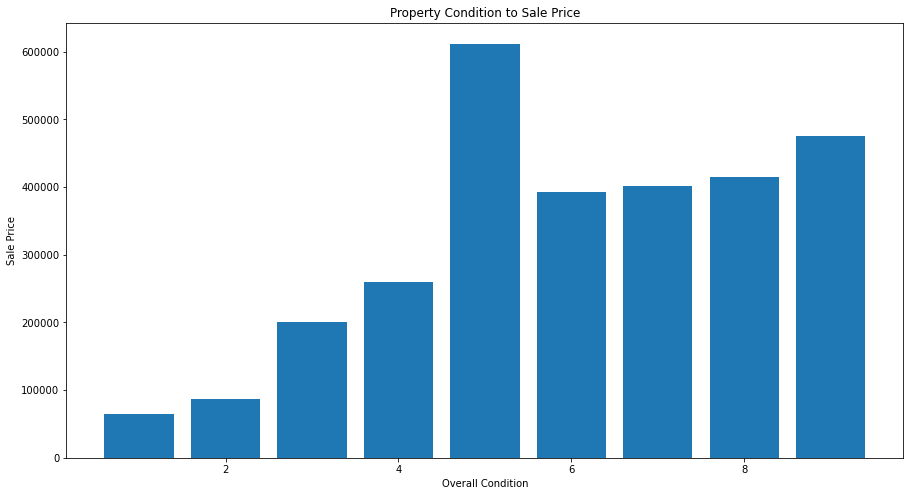

In [216]:
plt.figure(figsize=(15,8))
plt.title('Property Condition to Sale Price')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.bar(train_df['overall_cond'], train_df['saleprice']);

Again, much like our garage features, there is a point of diminishing returns.  So long as you reach that middle condition level, you will likely sell for a good price, but improving your house beyond that makes less of a difference.

# In Conclusion

What a homeowner can do to improve their home's value is limited:  it seems that whatever improvements can be made on a home only push the value up to a certain point.  Beyond that, those improvements do not offer a great return on the investment.  Still, that information is valuable:  if the homeowner can renovate their home in the ways that are most efficient (meeting base standards for home and garage conditions, adding a small open porch to the property), then they stand to sell their home for a price that makes those renovations profitable.  Improving the home beyond those base standards may be beneficial in some cases, but you run the risk of spending more than you make in return.
So, as my final recommendation, I would say to improve to those standards and then examine the price you hope to sell your property for, and if spending more to improve your property will hurt or aid your profits.
/look at other college towns?/
I do believe, to improve the quality of this model and its scope, it would be useful to gather data from other cities.  A small city, just outside Des Moines, will have a very different market than a small town in rural North Dakota, for instance, or even upstate New York.  I'd love to get data from, say, Grafton, North Dakota, and Albany, New York, and combine them all to see if that would make our model more general.  As it stands, I believe this model would only be most effective in Ames, Iowa, and other suburban midwestern towns.
